# Exploratory data analysis for benin-malanville

## Summary Statistics

### Reading data

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from windrose import WindroseAxes

In [2]:
df = pd.read_csv('../data/benin-malanville.csv')

### Inspect data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [4]:
df.shape

(525600, 19)

In [26]:
df.tail(10)   # Displays the first 5 rows starting from 0

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Month,Hour
Timestamp,,,,,,,,,,,,,,,,,,,,
2022-08-08 23:51:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.6,1.3,0.6,95.9,6.2,996,0,0.0,23.4,22.8,NaN,8,23
2022-08-08 23:52:00,-5.5,0.0,-5.8,0.0,0.0,23.1,98.3,0.4,1.1,0.5,94.0,2.5,996,0,0.0,23.4,22.8,NaN,8,23
2022-08-08 23:53:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.3,1.1,0.5,103.5,1.9,996,0,0.0,23.5,22.9,NaN,8,23
2022-08-08 23:54:00,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.4,0.1,1.1,0.3,94.3,1.5,996,0,0.0,23.5,22.9,NaN,8,23
2022-08-08 23:55:00,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.1,1.1,0.3,112.2,0.7,996,0,0.0,23.5,22.9,NaN,8,23
2022-08-08 23:56:00,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN,8,23
2022-08-08 23:57:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN,8,23
2022-08-08 23:58:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN,8,23
2022-08-08 23:59:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN,8,23


In [6]:
summary = df.describe()

In [7]:
summary

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


## Data Quality Check

* Check for missing values:

In [8]:
missing_values = df.isnull().sum()

In [9]:
missing_values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

* Check for Incorrect Entries

In [10]:
invalid_entries = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]
print(f"Invalid Entries Found:\n{invalid_entries}")


Invalid Entries Found:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev 

* Invalid Ranges: For columns like wind direction (WD), ensure values are within the valid range (0–360 degrees):

In [11]:
invalid_wd = df[(df['WD'] < 0) | (df['WD'] > 360)]
print(f"Invalid Wind Direction Entries:\n{invalid_wd}")



Invalid Wind Direction Entries:
Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, Comments]
Index: []


* Check Autliers

In [12]:
def detect_outliers_zscore(series, threshold=3):
  """
  Detects outliers in a pandas Series using the Z-score method.

  Args:
    series: The pandas Series containing the data.
    threshold: The z-score threshold for identifying outliers (default: 3).

  Returns:
    A boolean Series indicating whether each data point is an outlier.
  """
  z_scores = np.abs((series - series.mean()) / series.std())
  return z_scores > threshold

In [13]:
columns_to_check = ['ModA', 'ModB', 'WS', 'WSgust']

for col in columns_to_check:
  # Detect outliers using Z-score
  outliers_zscore = detect_outliers_zscore(df[col]) 
  print(f"Outliers in {col} (Z-score):")
  print(df[outliers_zscore])

Outliers in ModA (Z-score):
               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
674     2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
676     2021-08-09 11:17  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0   
850     2021-08-09 14:11  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9   
5019    2021-08-12 11:40  1324.0  675.6  659.6  1271.0  1271.0  29.1  75.4   
5024    2021-08-12 11:45  1360.0  827.0  543.5  1305.6  1305.6  29.6  71.3   
8021    2021-08-14 13:42  1309.0  880.0  427.1  1220.0  1222.0  30.6  68.4   
12245   2021-08-17 12:06  1390.0  860.0  518.3  1320.5  1320.5  28.8  75.9   
12246   2021-08-17 12:07  1413.0  880.0  523.9  1342.3  1342.3  28.8  75.0   
12270   2021-08-17 12:31  1381.0  878.0  481.2  1312.0  1312.0  29.3  72.7   
12271   2021-08-17 12:32  1391.0  869.0  500.4  1321.5  1321.5  29.4  74.8   
12272   2021-08-17 12:33  1375.0  818.0  535.2  1306.2  1306.2  29.7  72.7   
12303   2021-08-17 13:04  1302.0  89

## Time Series Analysis

* Visualize GHI, DNI, DHI, and Tamb Trends

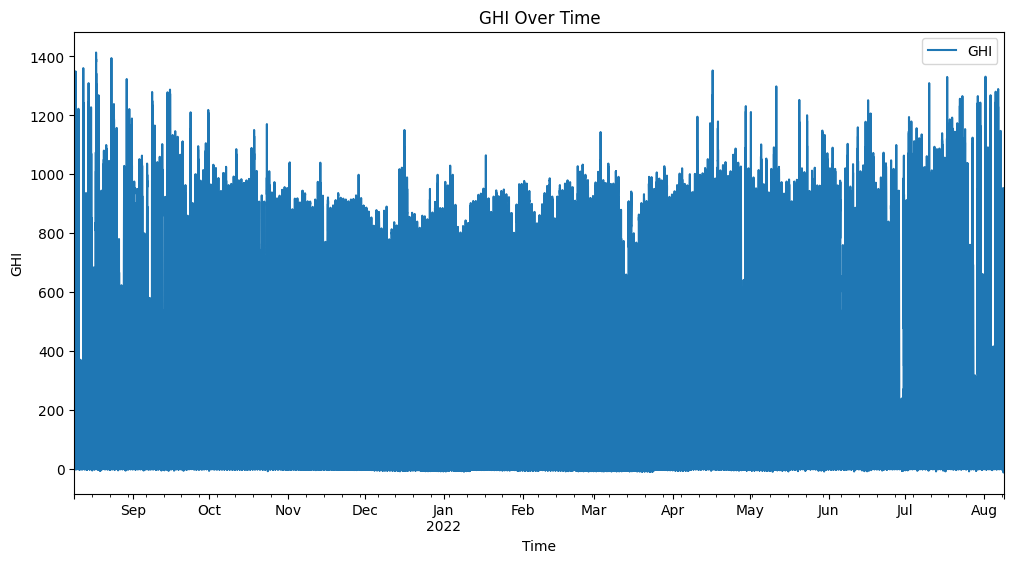

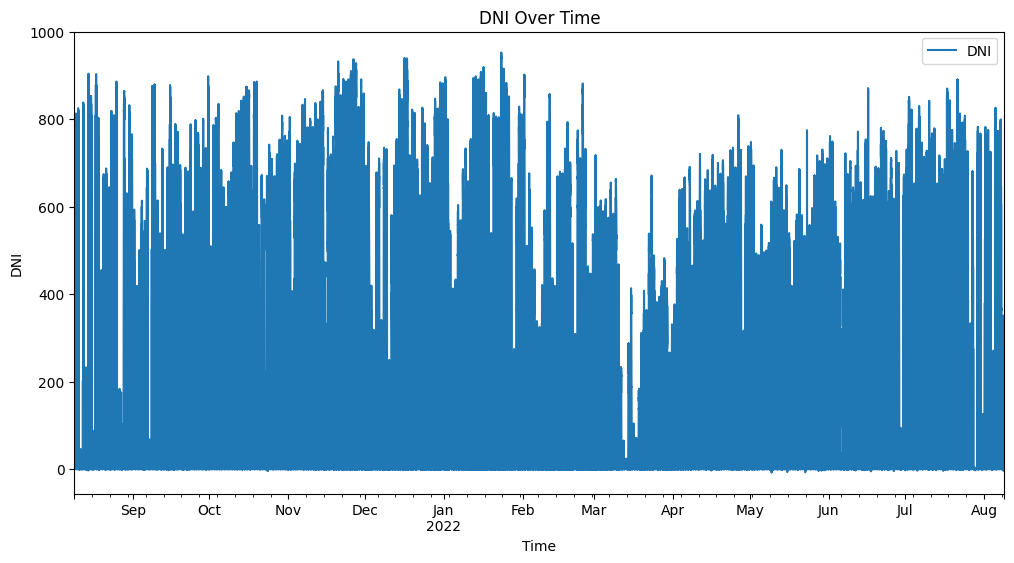

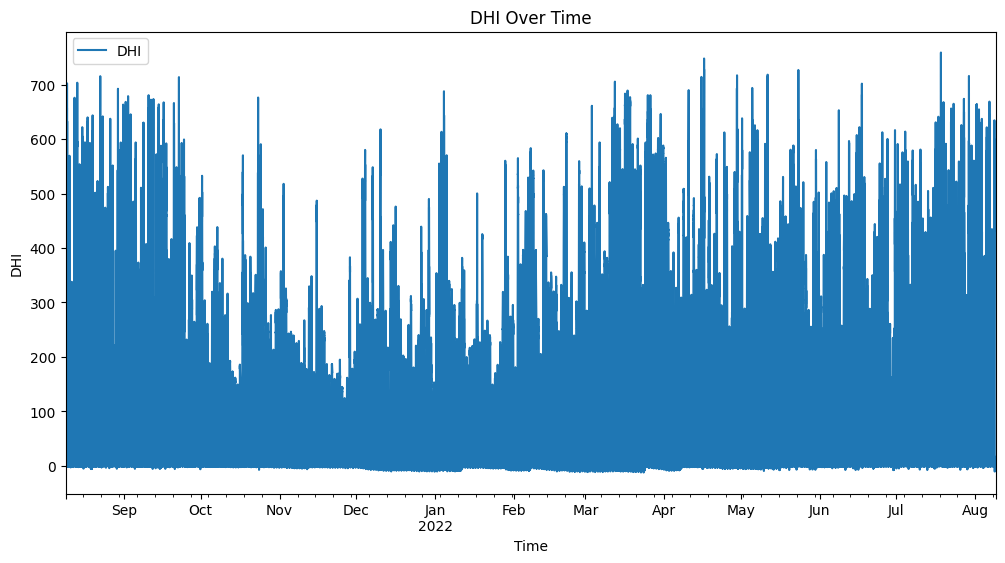

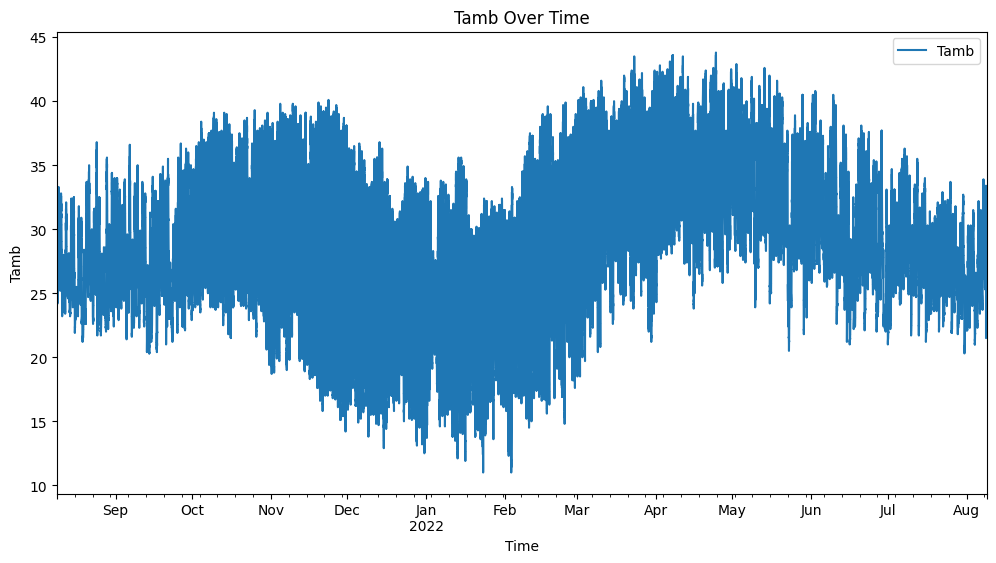

In [14]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as the index (optional, for better time-based plotting)
df.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, and Tamb over time
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.figure(figsize=(12, 6))
    df[col].plot(title=f'{col} Over Time', ylabel=col, xlabel='Time', legend=True)
    plt.show()

* Analyze Monthly Averages

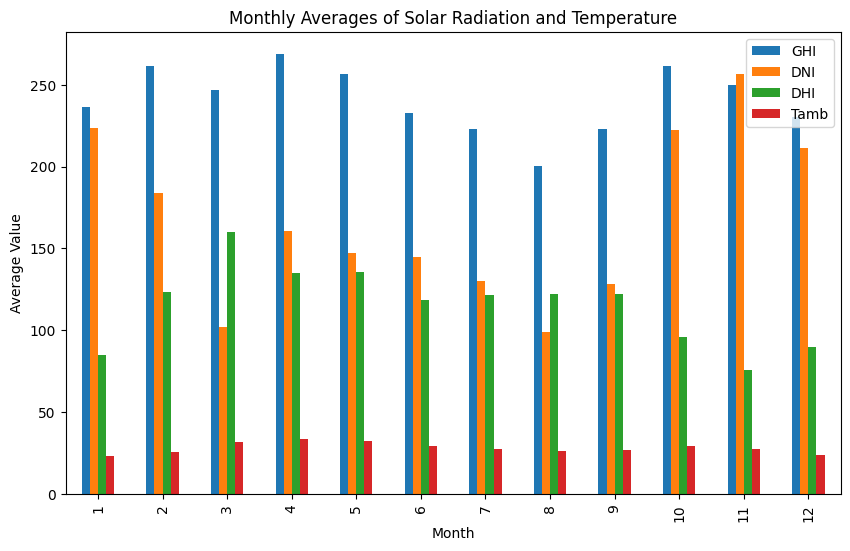

In [15]:
# Extract month for grouping
df['Month'] = df.index.month

# Group by month and calculate averages
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot monthly averages
monthly_avg.plot(kind='bar', figsize=(10, 6), title='Monthly Averages of Solar Radiation and Temperature')
plt.ylabel('Average Value')
plt.show()


* Analyze Hourly Trends

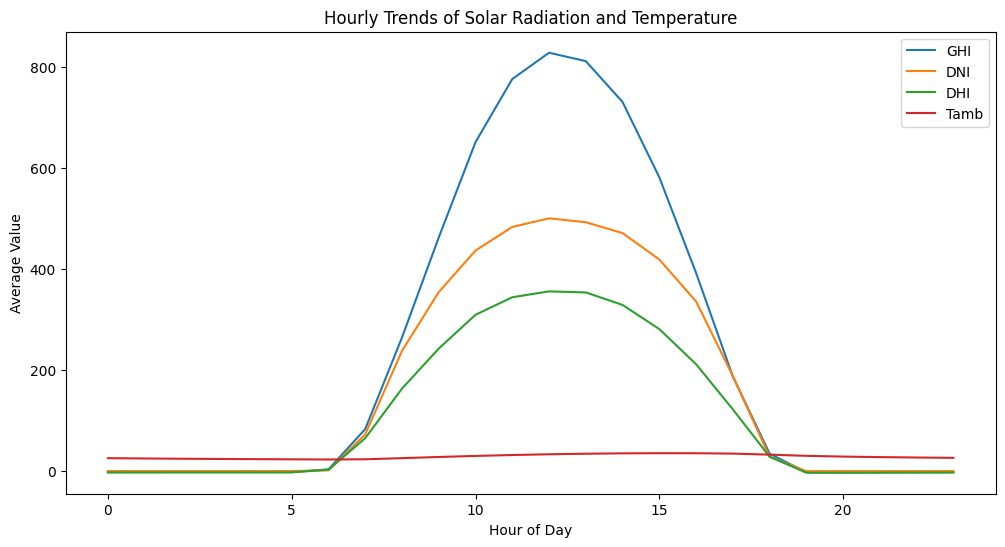

In [16]:
# Extract hour for grouping
df['Hour'] = df.index.hour

# Group by hour and calculate averages
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot hourly trends
hourly_avg.plot(figsize=(12, 6), title='Hourly Trends of Solar Radiation and Temperature')
plt.ylabel('Average Value')
plt.xlabel('Hour of Day')
plt.show()

* Evaluate the Impact of Cleaning

1. Compare Sensor Readings with Cleaning Events

Split the data into two groups: with cleaning (Cleaning = 1) and without cleaning (Cleaning = 0).
Plot the average values of ModA and ModB for both groups.

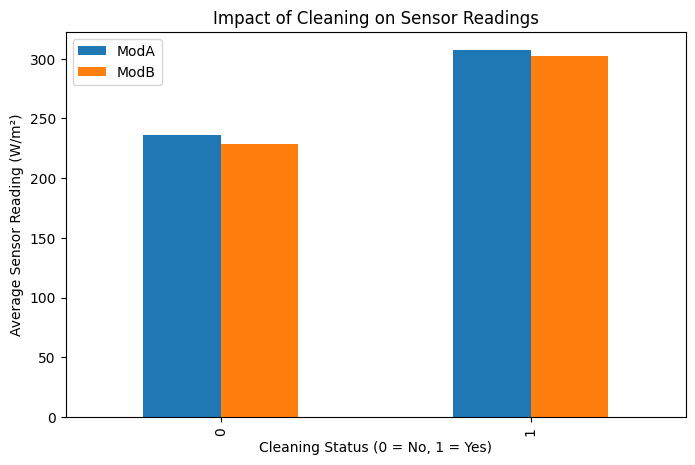

In [17]:
# Group data by cleaning status
cleaning_group = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Bar chart to compare sensor readings
cleaning_group.plot(kind='bar', figsize=(8, 5), title='Impact of Cleaning on Sensor Readings')
plt.ylabel('Average Sensor Reading (W/m²)')
plt.xlabel('Cleaning Status (0 = No, 1 = Yes)')
plt.show()


* Time Series Analysis with Cleaning Events

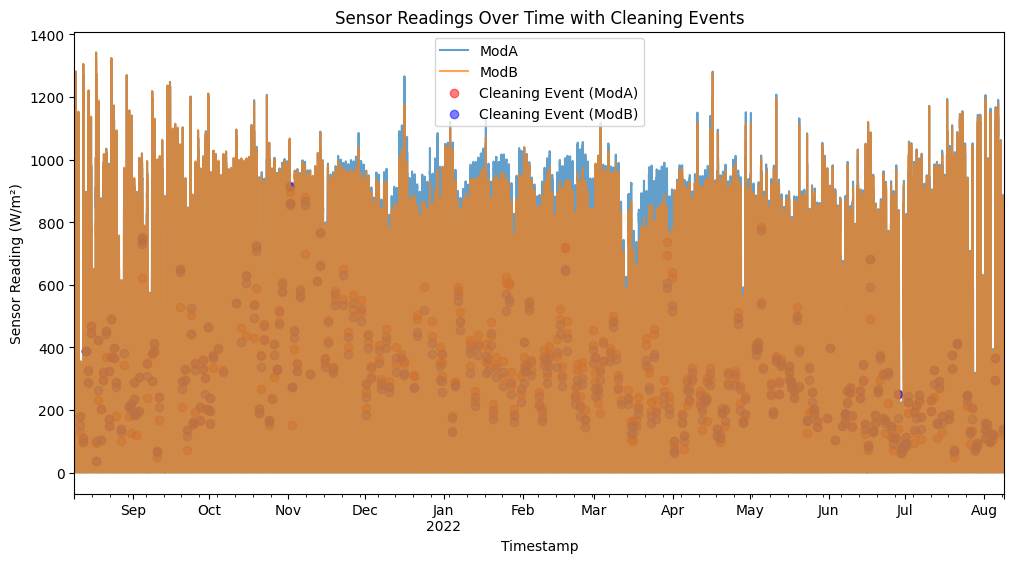

In [18]:
# Plot ModA and ModB over time with cleaning events
plt.figure(figsize=(12, 6))
df['ModA'].plot(label='ModA', alpha=0.7)
df['ModB'].plot(label='ModB', alpha=0.7)
plt.scatter(df[df['Cleaning'] == 1].index, df[df['Cleaning'] == 1]['ModA'], color='red', label='Cleaning Event (ModA)', alpha=0.5)
plt.scatter(df[df['Cleaning'] == 1].index, df[df['Cleaning'] == 1]['ModB'], color='blue', label='Cleaning Event (ModB)', alpha=0.5)
plt.title('Sensor Readings Over Time with Cleaning Events')
plt.ylabel('Sensor Reading (W/m²)')
plt.legend()
plt.show()


## Correlation Analysis:

- Compute Correlation Matrix

1. Calculate the correlation coefficients between GHI, DNI, DHI, TModA, TModB, WS, WSgust, and WD.
2. Use a heatmap to visualize these relationships.

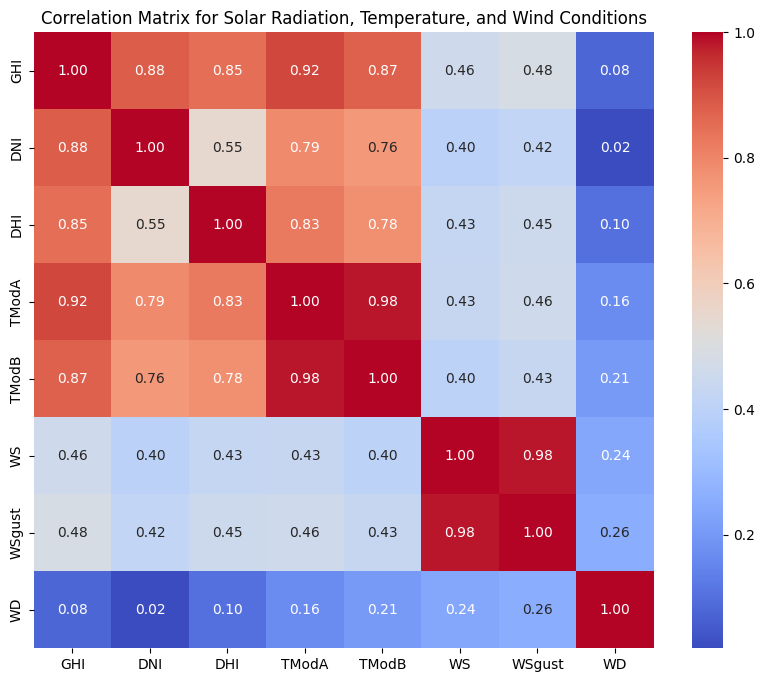

In [20]:
correlation_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']

# Compute correlation matrix
corr_matrix = df[correlation_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Solar Radiation, Temperature, and Wind Conditions')
plt.show()

Interpretation:

Strong correlations (values close to +1 or -1) indicate a strong relationship between variables.
Weak correlations (values close to 0) indicate little or no relationship.


* Pair Plots for Solar Radiation and Temperature

1. Pair plots visualize pairwise relationships between variables using scatter plots and histograms.
1. Focus on solar radiation components (GHI, DNI, DHI) and module temperatures (TModA, TModB).

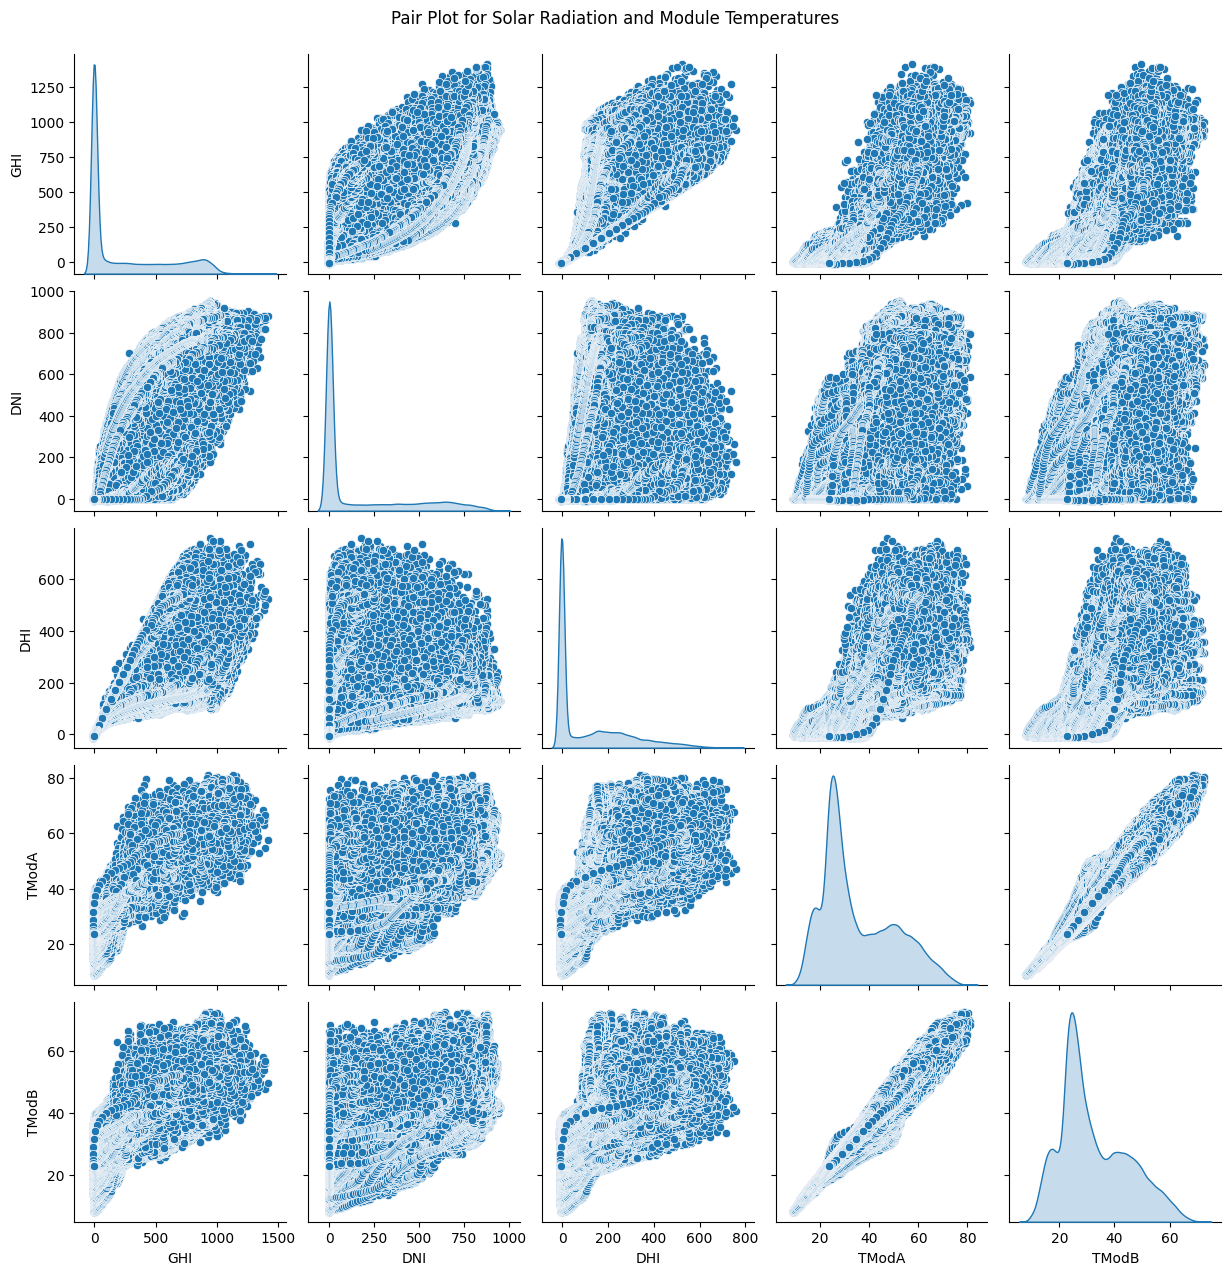

In [21]:
# Pair plot for solar radiation and module temperatures
sns.pairplot(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']], diag_kind='kde')
plt.suptitle('Pair Plot for Solar Radiation and Module Temperatures', y=1.02)
plt.show()


## Wind Analysis

- Prepare the Data

Use wind speed (WS) and wind direction (WD) data.

Group wind speed and direction into bins to make visualization easier.


In [32]:
# Define bins for wind speed
wind_speed_bins = [0, 2, 5, 8, 12, 20]  # Adjust ranges based on the dataset
wind_speed_labels = ['0-2', '2-5', '5-8', '8-12', '>12']

# Bin wind speed
df['WS_binned'] = pd.cut(df['WS'], bins=wind_speed_bins, labels=wind_speed_labels)

# Normalize wind direction to compass directions (e.g., 0° - 360°)
df['WD'] = df['WD'] % 360

* Create a Wind Rose

<Figure size 800x800 with 0 Axes>

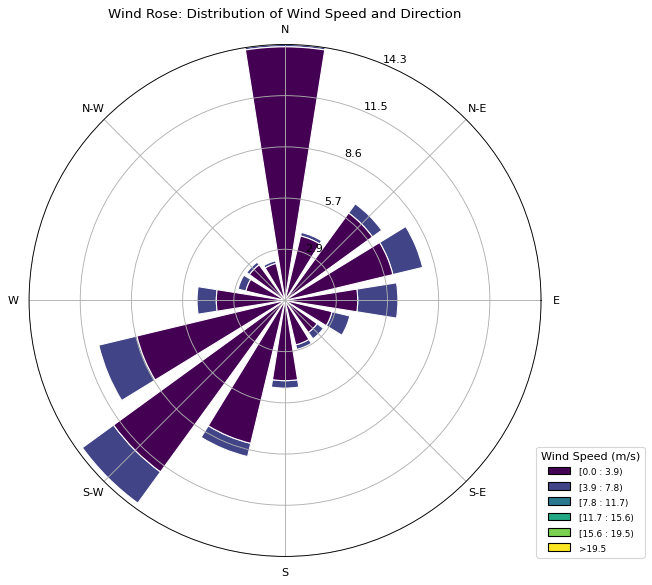

In [37]:
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose: Distribution of Wind Speed and Direction')
ax.set_legend(title="Wind Speed (m/s)", loc="lower right", bbox_to_anchor=(1.2, 0))
plt.show()

C:\Users\Tsegaye\AppData\Local\Temp\ipykernel_9240\4172618748.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_speed_avg = df.groupby(pd.cut(df['WD'], bins=wind_direction_bins))['WS'].mean()


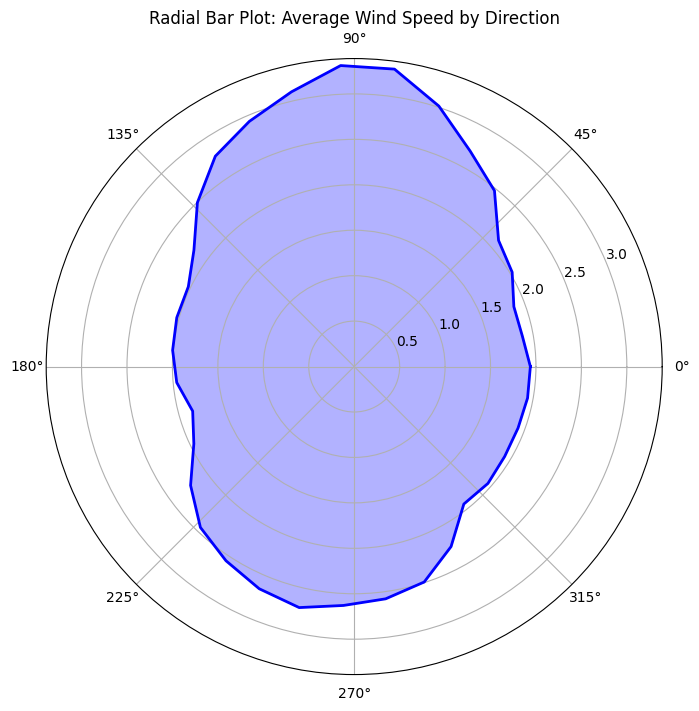

In [39]:
wind_direction_bins = np.arange(0, 360, 10)  # 10° intervals
wind_speed_avg = df.groupby(pd.cut(df['WD'], bins=wind_direction_bins))['WS'].mean()

# Create the plot
angles = np.linspace(0, 2 * np.pi, len(wind_speed_avg), endpoint=False)
wind_speed_avg = list(wind_speed_avg) + [wind_speed_avg.iloc[0]]  # Ensure circular continuity
angles = list(angles) + [angles[0]]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.plot(angles, wind_speed_avg, linewidth=2, color='blue')
ax.fill(angles, wind_speed_avg, alpha=0.3, color='blue')
ax.set_title('Radial Bar Plot: Average Wind Speed by Direction')
plt.show()